### CSE-221710312039-Paruchuri Sai Sumanth

### Problem Statement
- To predict the quality of wine using different algorithms

### Importing the required dependent libraries
Here we can find the libraries we will use in order to develop a solution for this problem.
- #### numpy|pandas: 
Will help us treat the data.
- #### matplotlib|seaborn: 
Will help us plot the information so we can visualize it in different ways and have a better understanding of it.
- #### sklearn: 
Will provide all necessary tools to train our models and test them afterwards.
- #### math: 
Will provide some functions we might want to use when testing our models (sqrt)
- #### prettytable: 
Will allow us to plot simple ascii tables

In [43]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from math import sqrt
from prettytable import PrettyTable

#### We load the .csv and visualize the last ten rows of it, we can also see the columns name


In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/Saisumanth15/AI-and-ML/master/wine1.csv")
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#### Now let's check the dataset shape so we can see the number of rows and columns


In [45]:
df.shape

(1599, 12)

##### As we can see, the name of some columns contains spaces, which is something we do not really want when treating data, this is why we are going to replace these spaces with "_".

##### Replace spaces with _ for each column

In [46]:
df.columns = df.columns.str.replace(' ', '_')


##### We check there are no missing values and no object data types

In [47]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- Fortunately for us, we find there are no null values and all datatypes seem to be right, since there are no object datatypes that must be converted to numerical values.

- After checking our dataset is fine and "ready to go" we are going to explore the data a little bit more, we are going to plot important information that will help us check how features behave and how they are correlated. We will also try to extract as much information as we can from it to help us understand the dataset better.
- Knowing our target variable is "quality", we are now going to plot some information about it. Let's see which values this column contains and how many of them there are.

#### let's start visualizing the different quality values and how many wines have that rating in our dataset

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

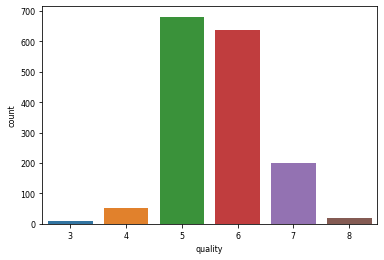

In [48]:
sns.countplot(df['quality'])
df['quality'].value_counts()

- Now that we got information about our target variable we are going to study the correlation between quality and other features and see which are the ones that play an important role in deciding the quality of a wine.
#### Calculate and order correlations

In [49]:
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


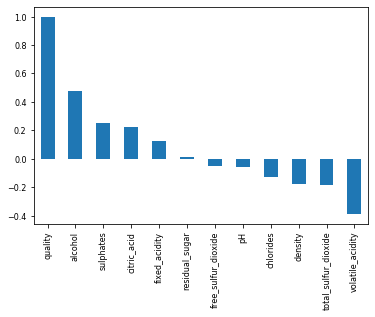

In [50]:
correlations.plot(kind='bar')


- Having now the correlation values between quality and the other features, let's have a look at the correlation matrix to have a better understanding of how features correlate with each other.
#### Heatmap to plot all correlations between features

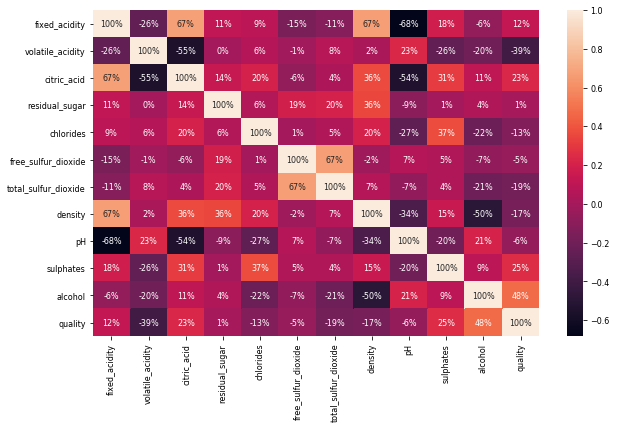

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

- From this matrix we can observe, apart from the information we had before, some obvious feature correlations such as pH and acidity. Apart from that, we get to know the percentage of the correlations we obtained before. We can also observe that approximately half of these features correlate positively with quality while the other half correlate negatively.
- From all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [52]:
print(abs(correlations) > 0.2)


quality                  True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
density                 False
total_sulfur_dioxide    False
volatile_acidity         True
Name: quality, dtype: bool


- From all the values, we are selecting alcohol, sulphates, citric_acid and volatile_acidity in order to study them better and see the distribution of values that separate the different qualities.

### Alcohol Percent

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

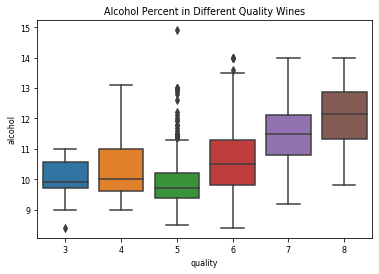

In [53]:
bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

- On this boxplot we can see how wines that contain less alcohol seem to be getting worse ratings while the ones with higher alcohol % are getting better quality ratings. However, we can observe how "mid quality" wines with rating 5 or 6 are presenting some strange values. Let's do some further investigation now:

- In order to see why we do have these different values, we are going to select a subset of the dataset which will only contain rows whose quality column value is 5 or 6, and we will calculate correlation coefficients for this subset.

In [54]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [55]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric_acid             0.080146
fixed_acidity           0.053447
pH                      0.043065
residual_sugar         -0.018452
free_sulfur_dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile_acidity       -0.237193
total_sulfur_dioxide   -0.239067
Name: quality, dtype: float64


- After calculating the correlations for wines with quality of 5 and 6 we find, that features that correlate the most with quality are the same as we obtained before. However, the difference of values shown on the boxplot can be explained due to having (although the highest) a poor correlation with quality.

#### Sulphates and Citric Acid Presence

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

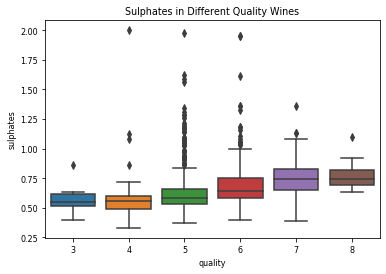

In [56]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

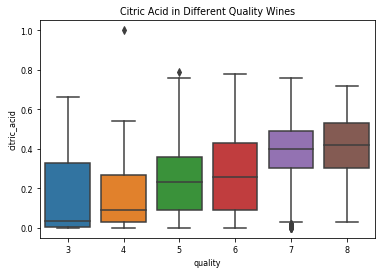

In [57]:
bp = sns.boxplot(x='quality',y='citric_acid', data=df)
bp.set(title="Citric Acid in Different Quality Wines")

- In the case of the features "sulphates" and "citric_acid" the relation between them and quality seem to be linearly positive, showing our correlation coefficients calculated before were right: adding higher amounts of sulphates and citric acid to these wines seem to get them higher quality ratings.

#### Acetic Acid Presence

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

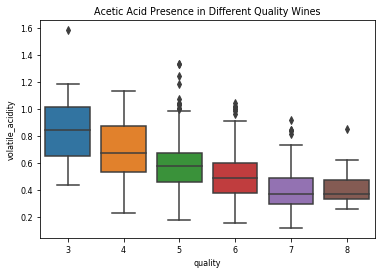

In [58]:
bp = sns.boxplot(x='quality',y='volatile_acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

- For the acetic acid presence, we can clearly observe how less acetic acid presence in wine seems positive while having higher values contribute to having a lower rating.

### More data visualization
- In the last subsection we plotted some box graphics in order to see which values belong to each quality. For further investigations we are now going to plot histograms for each of those important features so we can see better the correlation between the distribution of values from each feature and quality. To do so, we are first going to separate the quality values in three different groups, so we can do things a little bit easier:


1. Low: contains wines whose quality is 3 or 4.
2. Medium: contains wines whose quality is 5 or 6.
3. High: contains wines whose quality is 7 or 8.

#### We make a copy of our dataframe and group quality in differnt groups

In [59]:
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8],['high','high'],inplace=True)

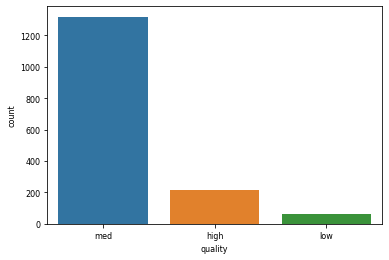

In [60]:
sns.countplot(df_aux['quality'])


#### We plot some histograms that show the values of features selected

E:\anaconda\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


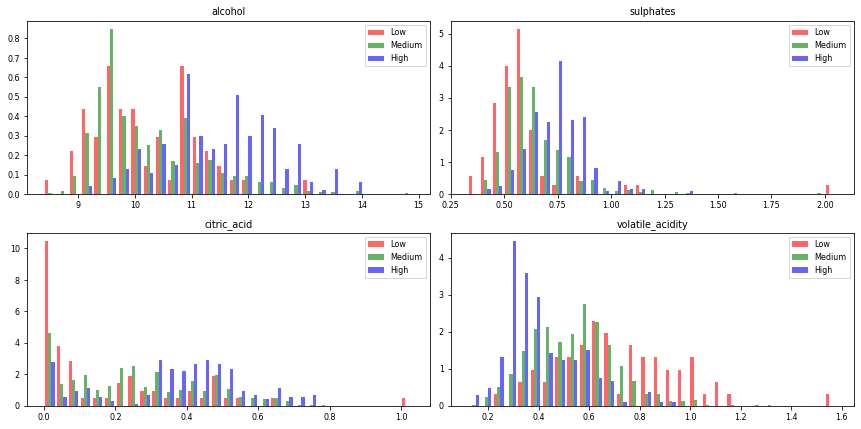

In [61]:
flistt = ['alcohol','sulphates','citric_acid','volatile_acidity']
low = df_aux[df_aux['quality'] == 'low']
medium = df_aux[df_aux['quality'] == 'med']
high = df_aux[df_aux['quality'] == 'high']
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows= 2, ncols= 2, figsize=(12,6))
graphs = graphs.flatten()
for i, graph in enumerate(graphs):
    graph.figure
    binwidth= (max(df_aux[flistt[i]]) - min(df_aux[flistt[i]]))/30
    bins = np.arange(min(df[flistt[i]]), max(df_aux[flistt[i]]) + binwidth, binwidth)
    graph.hist([low[flistt[i]],medium[flistt[i]],high[flistt[i]]], bins=bins, alpha=0.6, normed=True, label=['Low','Medium','High'], color=['red','green','blue'])
    graph.legend(loc='upper right')
    graph.set_title(flistt[i])
plt.tight_layout()

- As we can see in the histograms, higher values of alcohol, sulphates and citric acid seem to belong to higher quality wines while higher values of volatile acity are present in lower quality wines.

##  Feature Selection

- Now that we have already studied our dataset through histograms and different graphics it's time to select some features we will use in our machine learning algorithms. In this specific case, what we are going to do is use the same columns we studied before, since those are the four ones that give us the most information between features and quality.

In [62]:
correlations[abs(correlations) > 0.2]


quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric_acid         0.226373
volatile_acidity   -0.390558
Name: quality, dtype: float64

##  Classifier Models

- On this section, after having understood our data and dropped some useless features, we are going to make an estimation of quality based on the other features. To do so we are going to use Logistic Regression, Decision Tree Classifier and Random Forest Classifier. We will also plot the values of prediction and true quality and the confussion marices, so we can see how many of the predicted values are right (the diagonal of the matrix).

#### We separe our features from our target feature (quality) and we split data intro training and test

In [63]:
X = df.loc[:,['alcohol','sulphates','citric_acid','volatile_acidity']]
Y = df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Logistic Regression

#### Fit the model and make prediction

In [64]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

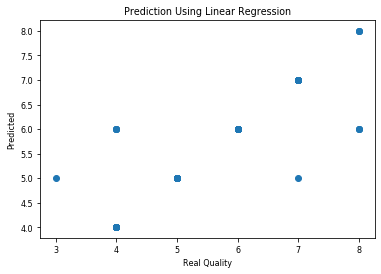

In [65]:
plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

#### Confussion Matrix for the Logistic Regression Model

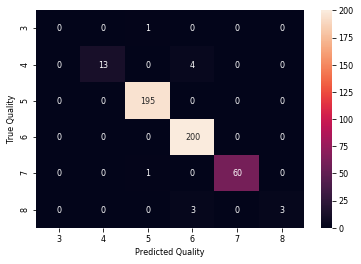

In [89]:
label_aux = plt.subplot()
cm_logistic_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_logistic_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

### Decision Tree Classifier

#### Fit the model and make prediction

In [67]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

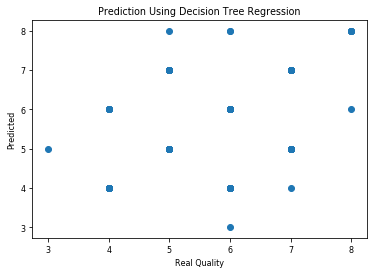

In [68]:
plt.scatter(y_test,y_prediction_dt)
plt.title("Prediction Using Decision Tree Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

#### Confussion Matrix for the Decission Tree Classifier Model

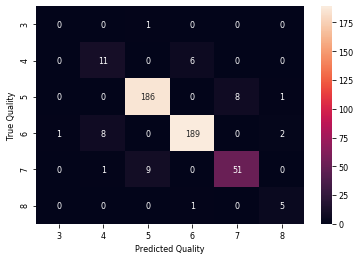

In [88]:
label_aux = plt.subplot()
cm_decision_tree_classifier = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_classifier,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

### Random Forest Classifier

#### Fit the model and make prediction

In [70]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

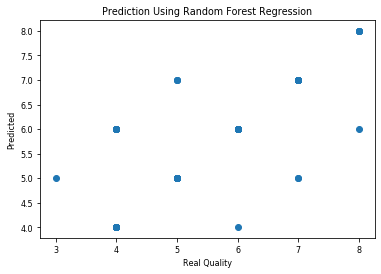

In [71]:
plt.scatter(y_test,y_prediction_rf)
plt.title("Prediction Using Random Forest Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

#### Confussion Matrix for the Decission Tree Classifier Model

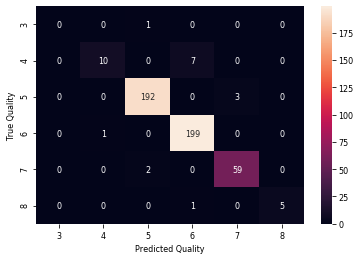

In [87]:
label_aux = plt.subplot()
cm_random_forest_classifier = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_classifier,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

### Root Mean Square Deviation(RMSD) or Root Mean Square Error(RMSE) of the Models

- After having prepared our models, it's now time to evaluate them. To do so we are going to use RMSE (Root Mean Square Error) which is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are so RMSE is a measure of how spread out these residuals are.

#### RMSD or RMSE for Logistic Regression

In [73]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print(RMSE)

0.27386127875258304


#### RMSD or RMSE for Decision Tree Classifier

In [74]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_dt))
print(RMSE)

0.589844612306213


#### RMSD or RMSE for Random Forest Classifier

In [75]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_rf))
print(RMSE)

0.3535533905932738


- When deciding which classifier algorithm is better by looking at RMSE we would better choose the one with smaller value, so for this problem, Logistic Regression seems to be the best fitting algorithm.

####  Improving the results with 1-Off Accuray

- As we can see from the confusion matrices we show above our predictions aren't bad at all but in order to "improve" them we are going to apply a concept called 1-off accuracy, which states that if the distance between our predicted quality and the true quality is 1 (in absolut value), we will accept it as a correct prediction.

- We will now create a function that will transform our predicted value into the true value if the distance between them is equal to 1. Afterwards we are going to plot the new correlation matrices and test the new values with some metrics.

In [76]:
def one_accuracy(predicted, true):
	i = 0
	for x,y in zip(predicted,true):
		if(abs(x-y)==1):
			predicted[i] = y
		i = i + 1

one_accuracy(y_prediction_lr, y_test)
one_accuracy(y_prediction_dt, y_test)
one_accuracy(y_prediction_rf, y_test)

#### Confussion Matrix for the Logistic Regression Model

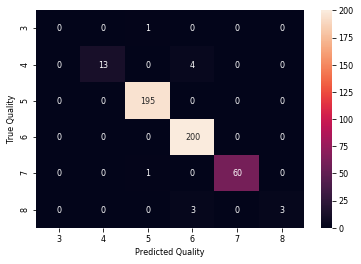

In [82]:
label_aux = plt.subplot()
cm_logistic_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_logistic_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

#### Confussion Matrix for the Decission Tree Classifier Model

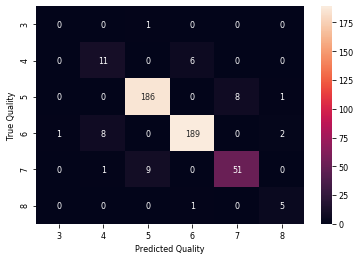

In [83]:
label_aux = plt.subplot()
cm_decision_tree_classifier = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_classifier,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

#### Confussion Matrix for the Random Forest Classifier Model

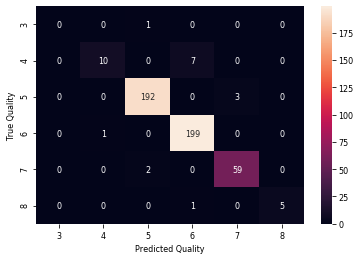

In [84]:
label_aux = plt.subplot()
cm_random_forest_classifier = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_classifier,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

- As we can see, our results are far better than the ones we obtained before. Therefore we are now going to calculate the new RMSE for all the three models.

In [85]:
RMSE_lr = sqrt(mean_squared_error(y_test, y_prediction_lr))
print("RMSE for new improved Logistic Regression is: " + str(RMSE_lr) + "\n")
RMSE_dt = sqrt(mean_squared_error(y_test, y_prediction_dt))
print("RMSE for new improved Decision Tree classifier is: " + str(RMSE_dt) + "\n")
RMSE_rf = sqrt(mean_squared_error(y_test, y_prediction_rf))
print("RMSE for new improved Random Forest classifier is: " + str(RMSE_rf) + "\n")

RMSE for new improved Logistic Regression is: 0.27386127875258304

RMSE for new improved Decision Tree classifier is: 0.589844612306213

RMSE for new improved Random Forest classifier is: 0.3535533905932738



### Testing Our Models with Precision, Recall and F1 Score

- For further testing, we are plotting a table that shows the precision, recall and f1score of our three classifier models.

In [86]:
ptbl = PrettyTable()
ptbl.field_names = ["classifier Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Logistic", precision_score(y_test, y_prediction_lr, average = 'weighted'),
           recall_score(y_test, y_prediction_lr, average = 'weighted'), f1_score(y_test, y_prediction_lr, average = 'weighted')])
ptbl.add_row(["Decision Tree", precision_score(y_test, y_prediction_dt, average = 'weighted'), recall_score(y_test, y_prediction_dt, average = 'weighted'), 
           f1_score(y_test, y_prediction_dt, average = 'weighted')])
ptbl.add_row(["Random Forest", precision_score(y_test, y_prediction_rf, average = 'weighted'), recall_score(y_test, y_prediction_rf, average = 'weighted'),
           f1_score(y_test, y_prediction_rf, average = 'weighted')])
print(ptbl)

+------------------+--------------------+--------------------+--------------------+
| classifier Model |     Precision      |       Recall       |      F1Score       |
+------------------+--------------------+--------------------+--------------------+
|     Logistic     | 0.9797021240507777 |      0.98125       | 0.9787385410477942 |
|  Decision Tree   | 0.9244520350513087 | 0.9208333333333333 | 0.9222441874543856 |
|  Random Forest   | 0.9661947165672622 |      0.96875       | 0.9660315070376045 |
+------------------+--------------------+--------------------+--------------------+


E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest and Logistic Regression seem to be the best fitting models when solving this problem using classifier.